In [46]:
import numpy as np
import matplotlib.pyplot as plt
# Produce signal and noise
A = 2.5
theta = np.pi/10
w0 = np.pi/4
L = 100
n = np.r_[0:L] # n = np.ndarray(L)

x = A*np.cos(w0*n+ theta)
noise_std = 0.25
noise = np.random.normal(0,noise_std,L)
y = x + noise

In [47]:
X = np.array([np.cos(w0*n), np.sin(w0*n)]).T
print(f'shape of X: {X.shape}')
w = np.linalg.inv(X.T@X)@X.T@y # @ = matrix multiplication
print(f'shape of w: {w.shape} and w is {w}')
w = np.linalg.pinv(X)@y
print(f'shape of w: {w.shape} and w is {w}')
w = np.linalg.lstsq(X,y,rcond=None)[0]
print(f'shape of w: {w.shape} and w is {w}')

shape of X: (100, 2)
shape of w: (2,) and w is [ 2.36629848 -0.73308798]
shape of w: (2,) and w is [ 2.36629848 -0.73308798]
shape of w: (2,) and w is [ 2.36629848 -0.73308798]


In [48]:
Ahat = np.sqrt(w[0] ** 2 + w[1] ** 2)
print(f'A: theory = {A}, estimate = {Ahat}')
thetahat = -np.arctan2(w[1],w[0])
print(f'theta: theory = {theta}, estimate = {thetahat}')

A: theory = 2.5, estimate = 2.4772538152465953
theta: theory = 0.3141592653589793, estimate = 0.3004265542875586


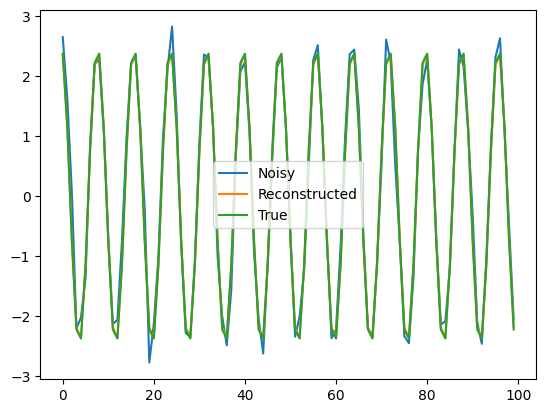

In [49]:
x_rec = X@w # reconstracted signal
plt.plot(n,y,label='Noisy')
plt.plot(n,x_rec,label='Reconstructed')
plt.plot(n,x,label='True')
plt.legend()
plt.show()

In [50]:
e = y - x_rec
est_noise_var = np.mean(e**2)
print(f'noise variance: estimate = {est_noise_var}, theory = {noise_std ** 2}')

noise variance: estimate = 0.05017861230322323, theory = 0.0625


In [51]:
snr_est = np.mean(x ** 2) / est_noise_var
snr_theory = A ** 2 / noise_std ** 2
print(f'SNR: estimate = {snr_est}, theory = {snr_theory}')

SNR: estimate = 62.27752934090739, theory = 100.0
